# 1. Exploratory Data Analysis 

### Importing Neccesary Packages

In [2]:
import time
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

### Getting Data from Yahoo Finance

In [5]:
#the link to access the data = https://finance.yahoo.com/quote/BTC-USD/history?period1=1410912000&period2=1656633600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
btc = f'https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1410912000&period2=1656633600&interval=1d&events=history&includeAdjustedClose=true'

### Load the Data

In [6]:
#Reading the data
data= pd.read_csv(btc, parse_dates=['Date'], index_col=['Date'])

In [ ]:
data.columns

### Data Information

Date: Represents the year, month, and day <br> Open: Is the opening price in USD <br> High: Is the highest price Bitcoin rose to on that day <br> Low: Low is the lowest prices Bitcoin fell to that day <br> Close: Is the closing price of Bitcoin on that day <br> Adj Close: Is the adjusted closing price of Bitcoin with factors such as dividends and stock splits in consideration <br> Volume: Is the number of trader made with Bitcoin, either buying or selling on that day

### Tail and Head

Looking at the Tail and head of data we see that the data begins at the day bitcoin started publically trading and goes up to the current date. 

In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-27,21028.238281,21478.089844,20620.199219,20735.478516,20735.478516,20965695707
2022-06-28,20731.544922,21164.423828,20228.812500,20280.634766,20280.634766,21381535161
2022-06-29,20281.169922,20364.156250,19937.791016,20104.023438,20104.023438,23552740328
2022-06-30,20108.312500,20141.160156,18729.656250,19784.726563,19784.726563,26267239923
2022-07-01,19820.470703,20632.671875,19073.708984,19269.367188,19269.367188,30767551159


### Looking at the shape

We see that the data has 2845 distinct data points which are days since the begining of our data set. <br> We also see that there are 7 columns which are the data features which we described earlier.

In [7]:
data.shape

(2845, 6)

### Check the data types of the columns for the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2845 entries, 2014-09-17 to 2022-07-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2845 non-null   float64
 1   High       2845 non-null   float64
 2   Low        2845 non-null   float64
 3   Close      2845 non-null   float64
 4   Adj Close  2845 non-null   float64
 5   Volume     2845 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 155.6 KB


### Information about the data

In [9]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2.845000e+03
mean,12419.694077,12742.921795,12056.168096,12424.640611,12424.640611,1.541338e+10
std,16597.387127,17026.070275,16099.580408,16592.623381,16592.623381,1.993284e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,630.825012,641.284973,622.395020,632.828003,632.828003,8.612530e+07
50%,6550.870117,6643.779785,6449.609863,6550.160156,6550.160156,5.800460e+09
75%,11495.038086,11794.775391,11231.799805,11490.500000,11490.500000,2.626724e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


Here we see that the average of Open and close are smilar to each other with a difference of 5 dollars. <br> We also see that the minimum orice of Bitcoin has been 171.5 USD over its time span and the highest price of 68789 USD. <br> We also notice in Bitcoins case the Close and the adjusted close values are the same.

### Checking for missing values

In [10]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

We see that there are no null values present in the dataset

## EDA

### Univariative analysis

In [11]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


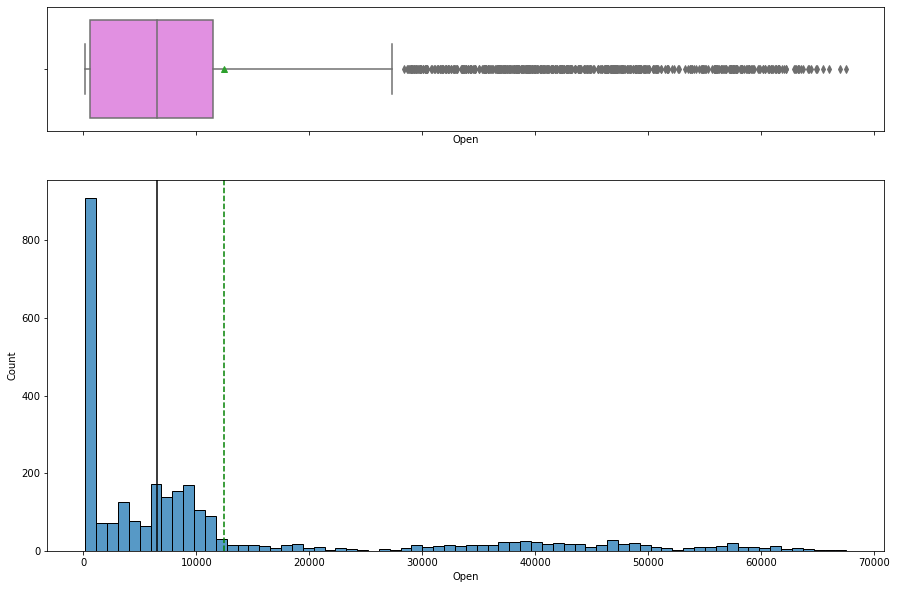

In [12]:
histogram_boxplot(data,"Open",bins=70)

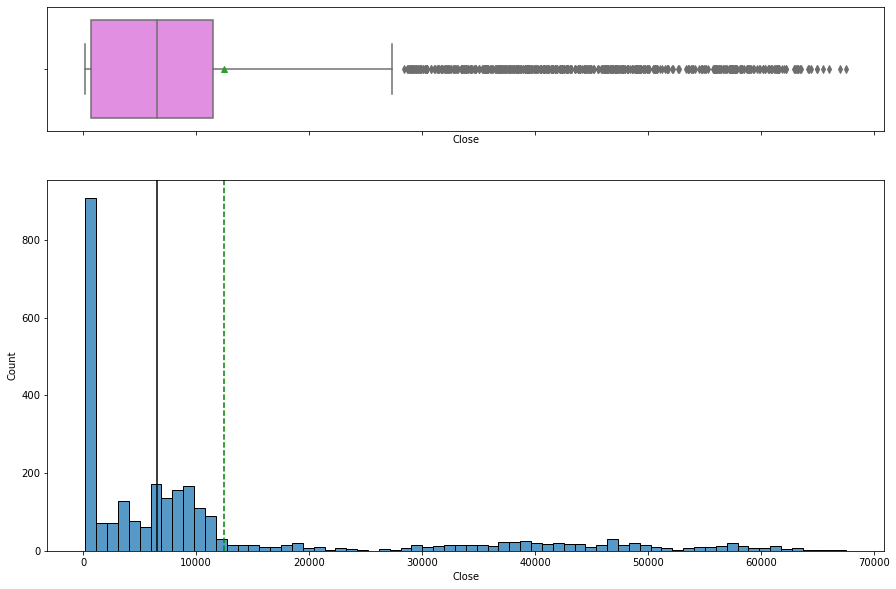

In [13]:
histogram_boxplot(data,"Close",bins=70)

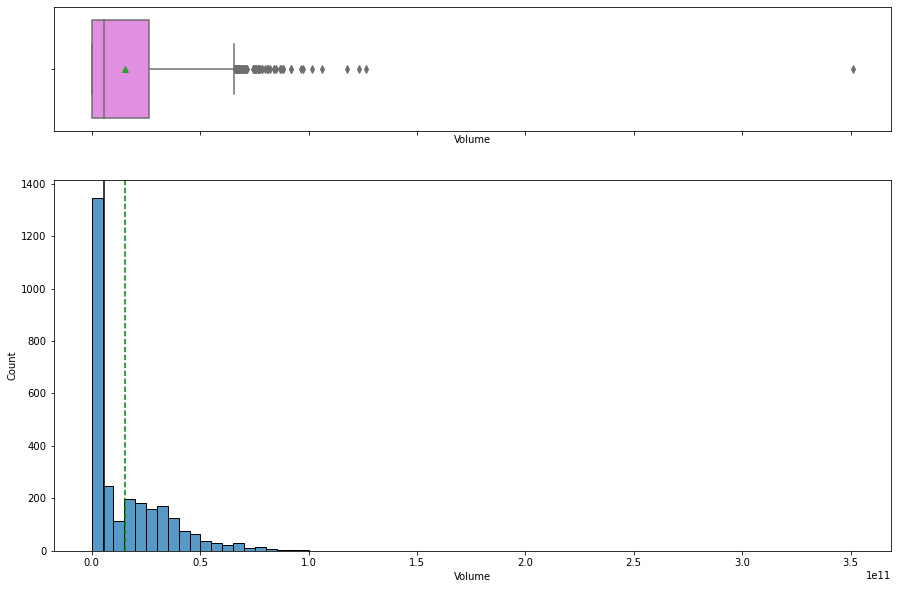

In [14]:
histogram_boxplot(data,"Volume",bins=70)

In the three graphs above we see that the Open, close and the volume of trades is skewed to the right and the reasons for this are obvious as Bitcoin is extremely volatile and we have seen significant  rise and fall in prices over the past years.

### Bivariative Analysis

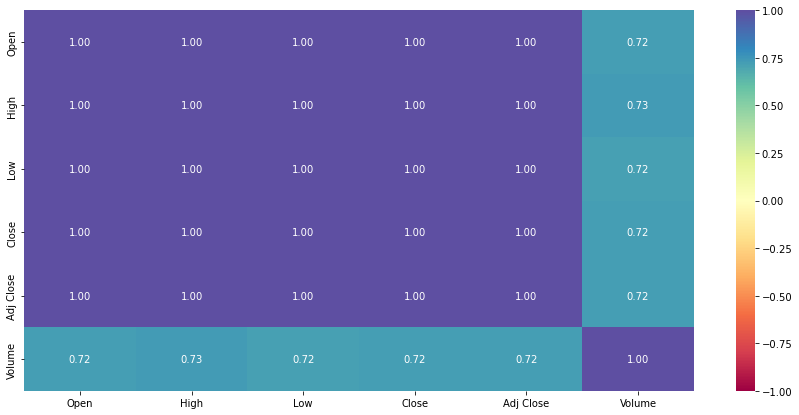

In [15]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

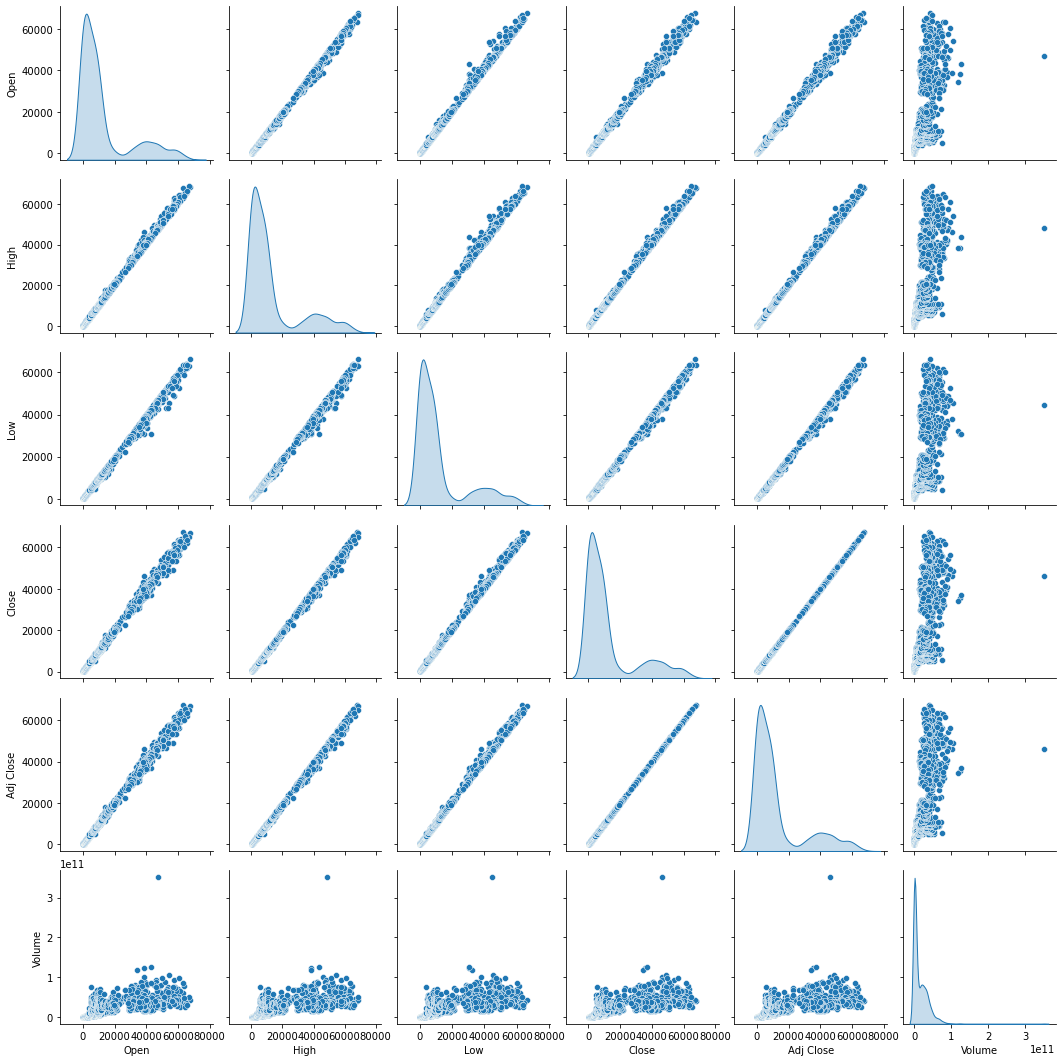

In [16]:
sns.pairplot(data=data, diag_kind="kde")
plt.show()

Both the corellation graph and the Pairplot show us how all the values of the data we have are extremely correlated and this can further be observed in our analysis below.

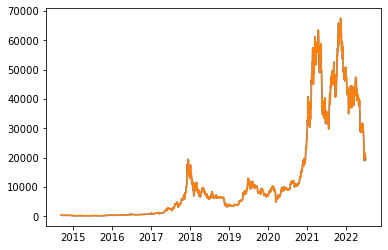

In [17]:
plt.plot(data[["Close","Open"]])

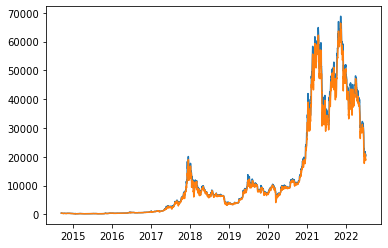

In [18]:
plt.plot(data[["High","Low"]])

We notice how the prices for Open, Low, High and close show a similar trend. <br> We see that the Open and close graph have almost no difference in their values. <br> Whereas the High and Low values comparsion graph shows a significant visual difference. <br> The graphs above also show us reasonable informatio about Bitcoins trend over the years: <br> Bitcoin was at its highest closer to 70000 USD in late 2021 <br> 2. Bitcoin started to fall after the immediate peak and crashed to 40000 USD in December <br> 3. We are still in a state of decline with the price of Bitcoin now at arounnd 20000 USD

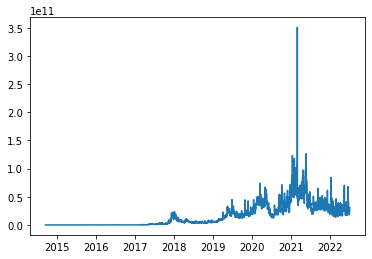

In [19]:
plt.plot(data["Volume"])

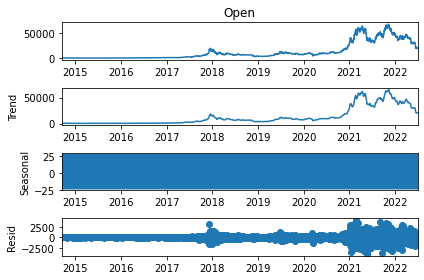

In [20]:
results = seasonal_decompose(data['Open'])
results.plot();

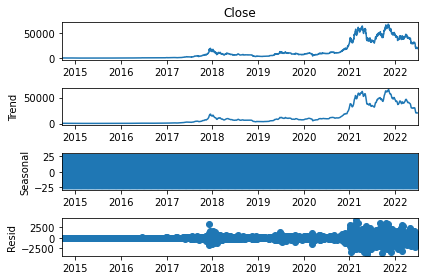

In [21]:
results = seasonal_decompose(data['Close'])
results.plot();

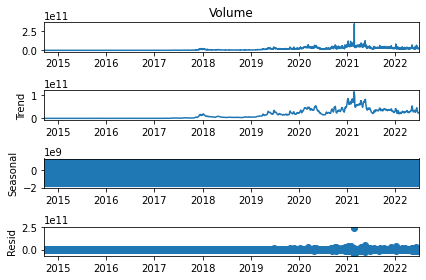

In [22]:
results = seasonal_decompose(data['Volume'])
results.plot();

The image above shows us the volume of the trades being made with Bitcoin. <br> We see that the highest number of trades cocured in the period from mid 2020 to late 2021.

We will be looking at the closing price to create our LSTM Model using RNN as that is what we are going to predict.